In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import lmfit

In [82]:
data0 = np.loadtxt('../data/zeeman_used/ZeemanX_ohneB.txt', delimiter=';', skiprows=5)
data_mess = np.loadtxt('../data/zeeman_used/ZeemanX_6790mA.txt', delimiter=';', skiprows=5)
data1 = np.loadtxt('../data/zeeman_used/ZeemanX_4020mA.txt', delimiter=';', skiprows=5)
data2 = np.loadtxt('../data/zeeman_used/ZeemanX_4580mA.txt', delimiter=';', skiprows=5)
data3 = np.loadtxt('../data/zeeman_used/ZeemanX_5420mA.txt', delimiter=';', skiprows=5)
data4 = np.loadtxt('../data/zeeman_used/ZeemanX_5700mA.txt', delimiter=';', skiprows=5)
data5 = np.loadtxt('../data/zeeman_used/ZeemanX_6000mA.txt', delimiter=';', skiprows=5)
data6 = np.loadtxt('../data/zeeman_used/ZeemanX_6550mA.txt', delimiter=';', skiprows=5)
data7 = np.loadtxt('../data/zeeman_used/ZeemanX_7080mA.txt', delimiter=';', skiprows=5)
data8 = np.loadtxt('../data/zeeman_used/ZeemanX_7620mA.txt', delimiter=';', skiprows=5)
data9 = np.loadtxt('../data/zeeman_used/ZeemanX_8010mA.txt', delimiter=';', skiprows=5)
data10 = np.loadtxt('../data/zeeman_used/ZeemanX_8720mA.txt', delimiter=';', skiprows=5)

alldata = np.array([data0, data_mess, data1, data2, data3, data4, data5, data6, data7, data8, data9, data10])
#dataB = np.array([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10])
dataB = np.array([data2, data3, data4, data5, data6,data_mess, data7, data8, data9, data10])

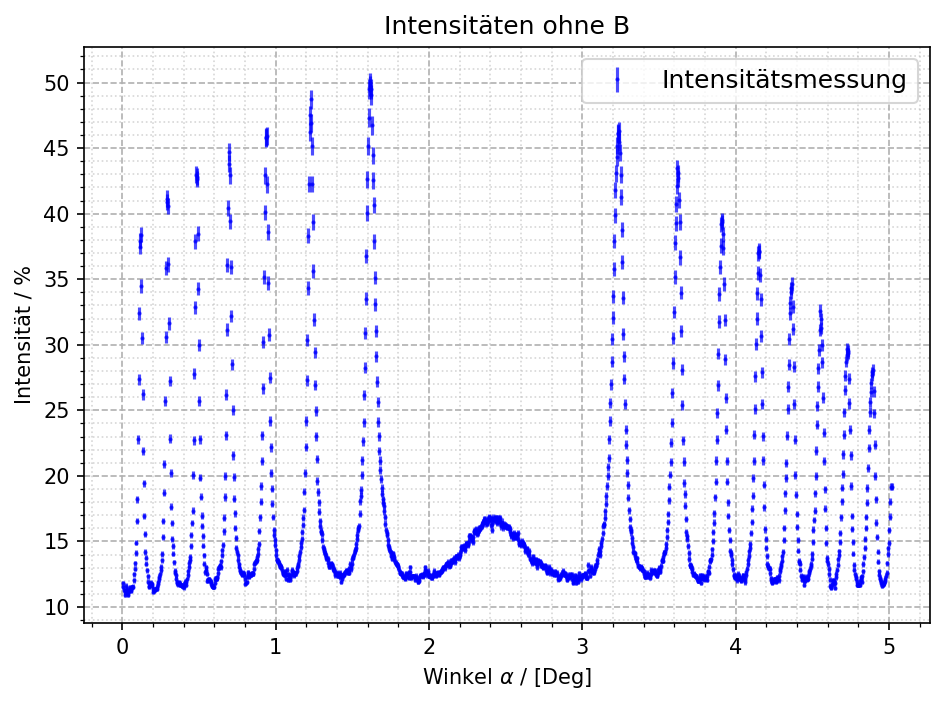

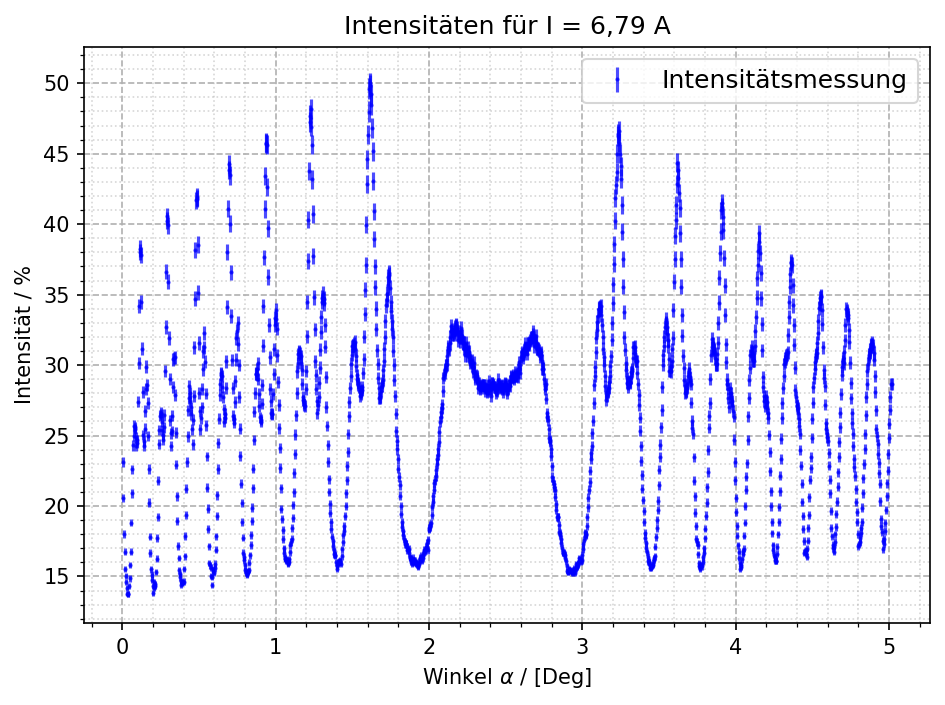

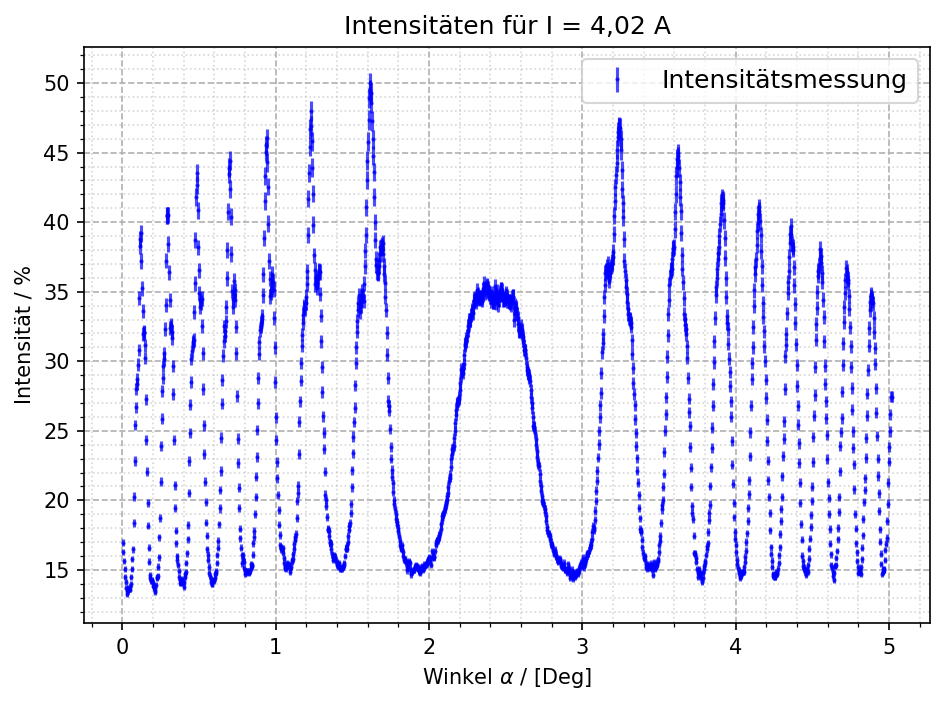

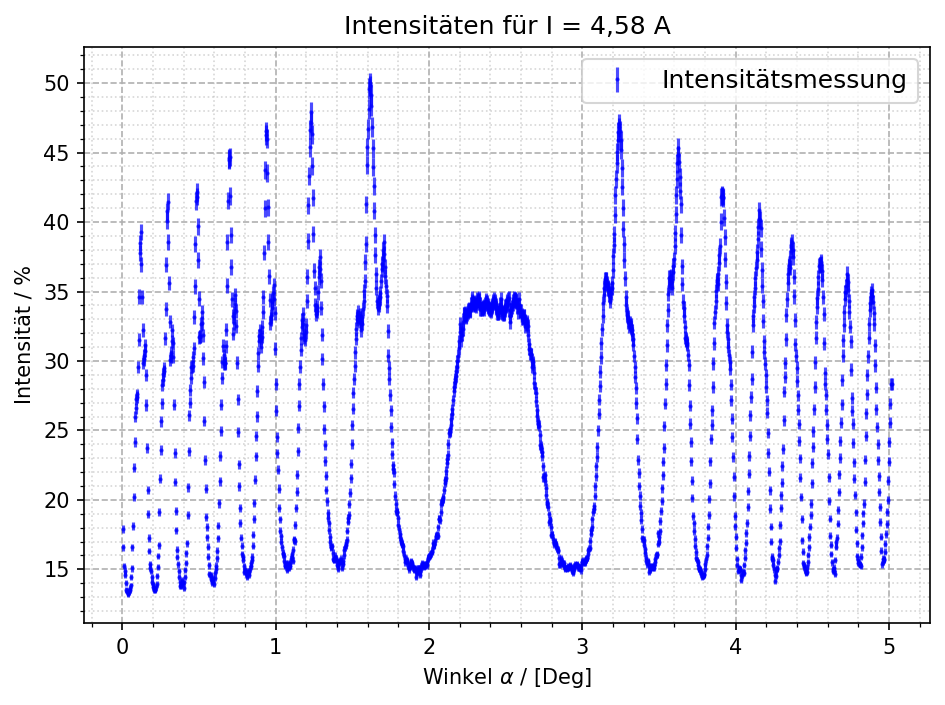

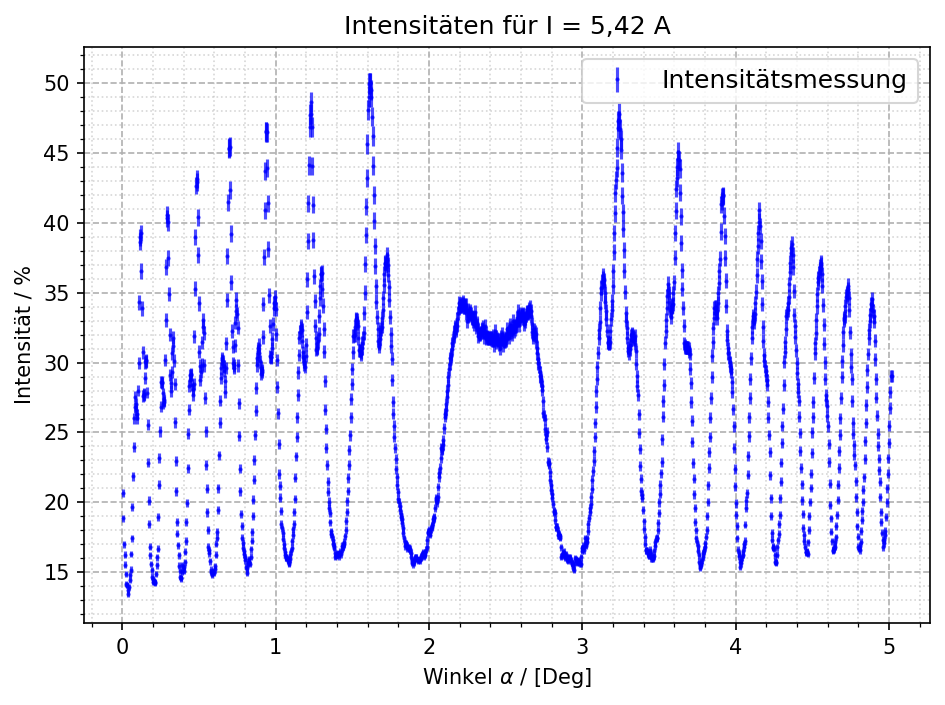

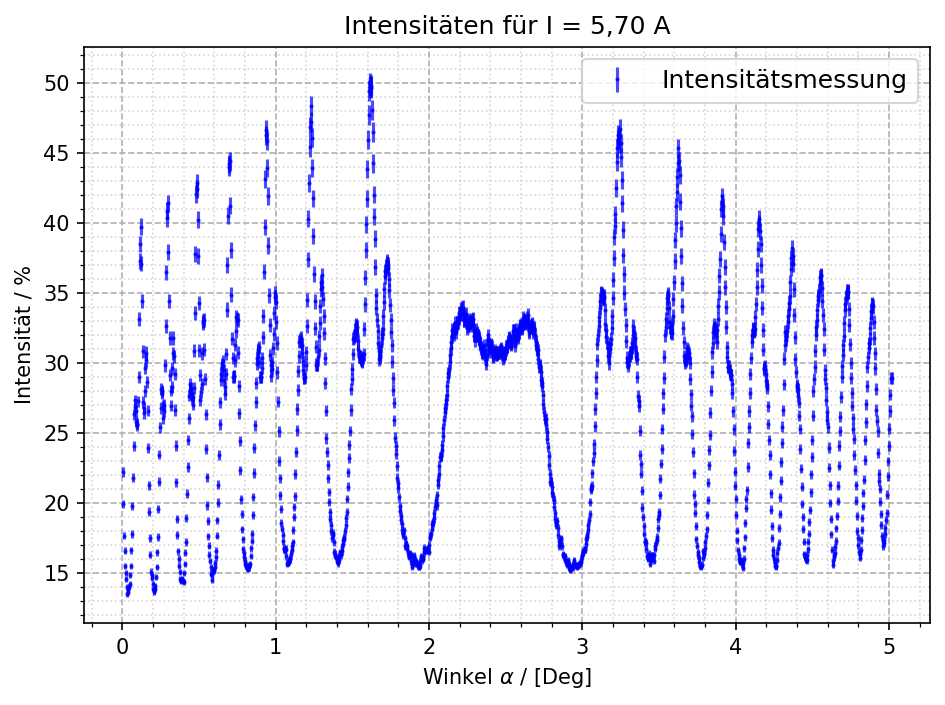

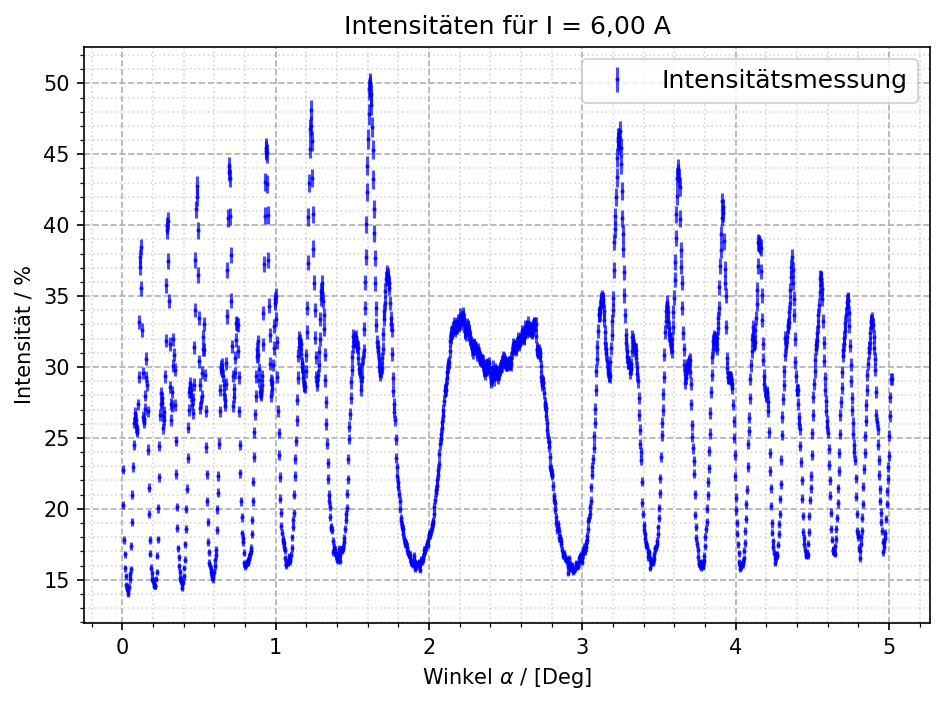

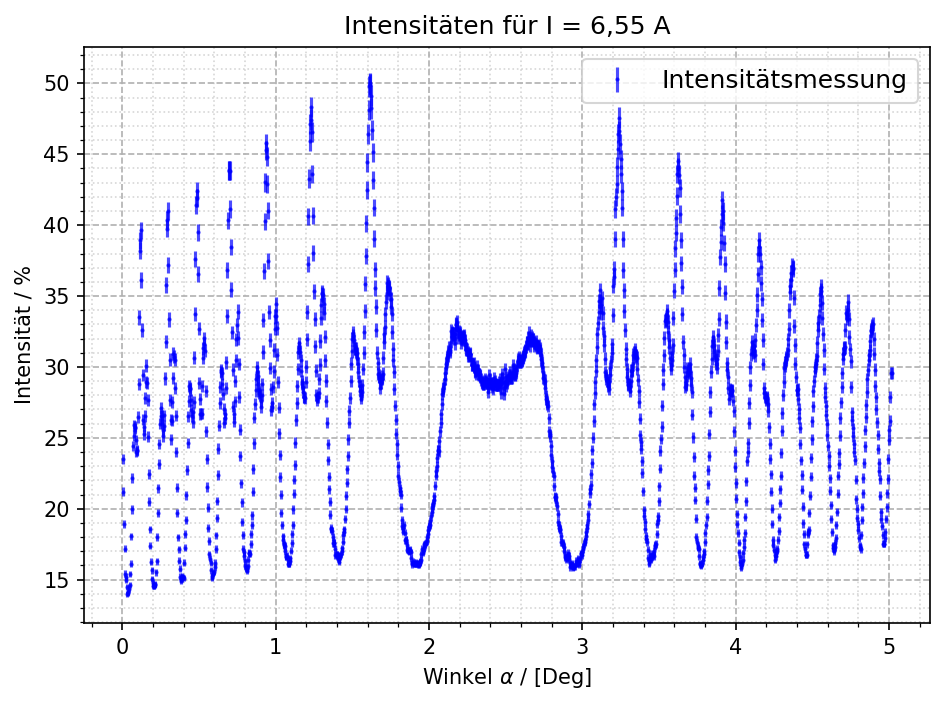

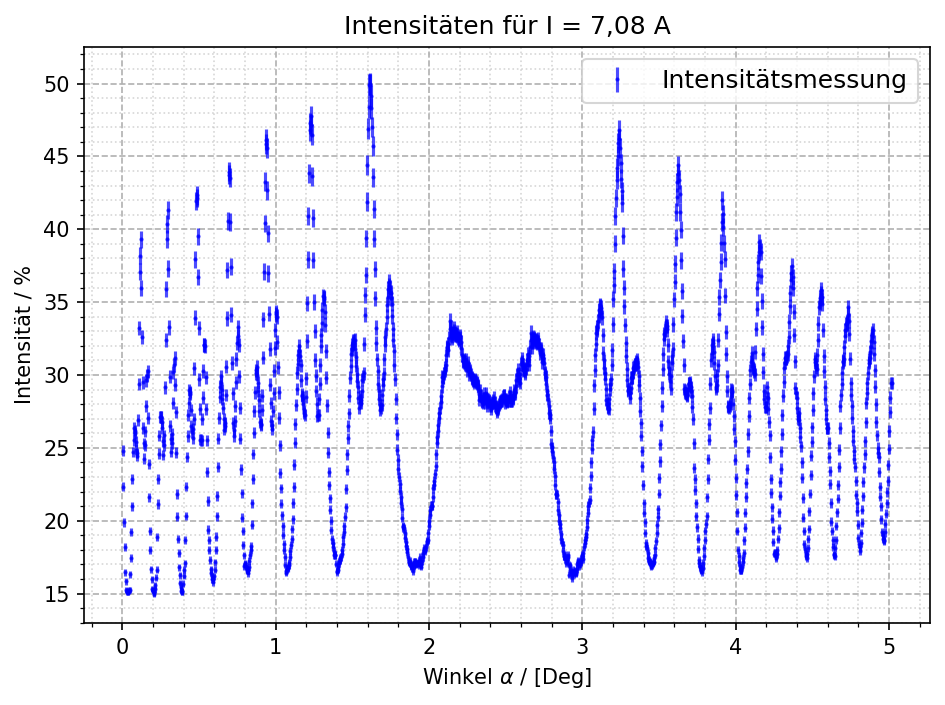

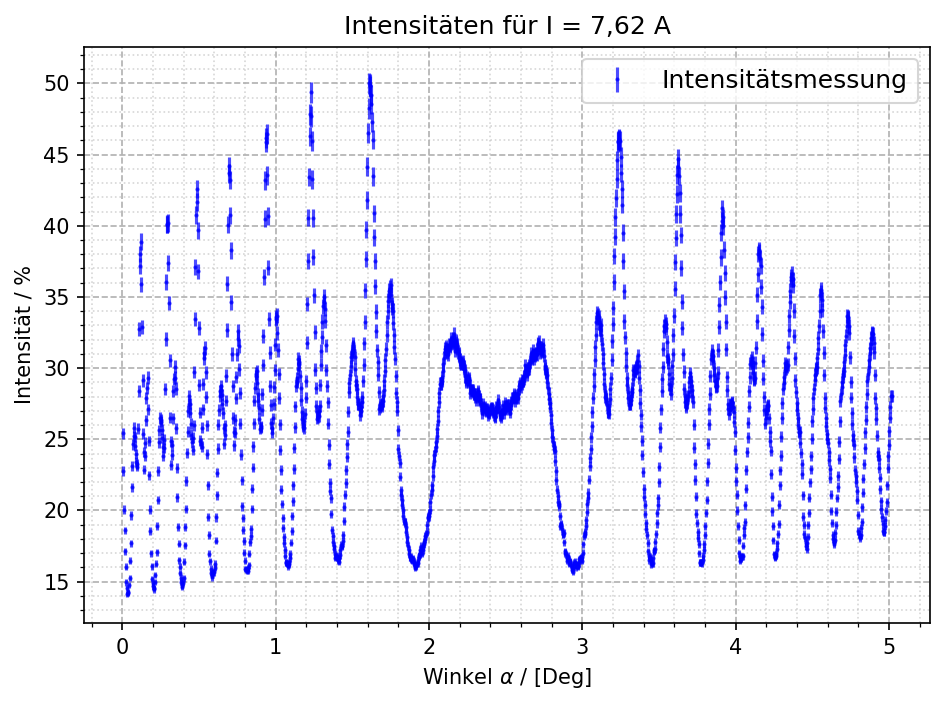

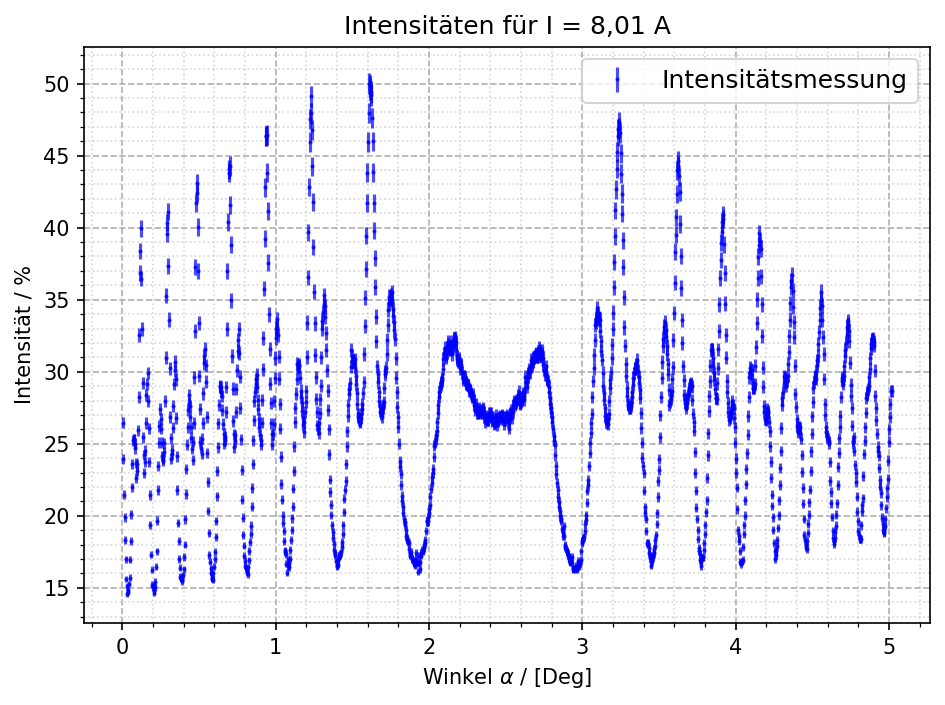

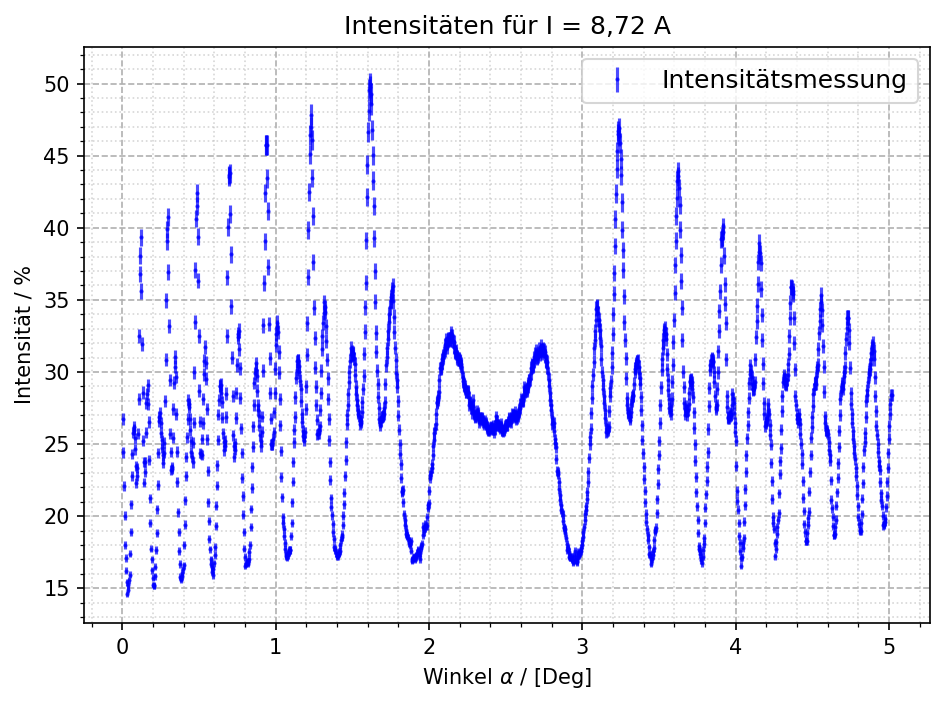

In [83]:
alldata_namen = [
    'ohne B',
    'für I = 6,79 A',
    'für I = 4,02 A',
    'für I = 4,58 A',
    'für I = 5,42 A',
    'für I = 5,70 A',
    'für I = 6,00 A',
    'für I = 6,55 A',
    'für I = 7,08 A',
    'für I = 7,62 A',
    'für I = 8,01 A',
    'für I = 8,72 A'
]
alldata_benennung = [
    'ohneB',
    '6790mA',
    '4020mA',
    '4580mA',
    '5420mA',
    '5700mA',
    '6000mA',
    '6550mA',
    '7080mA',
    '7620mA',
    '8010mA',
    '8720mA'
]
'''
dataB_namen = [
    '4,02 A',
    '4,58 A',
    '5,42 A',
    '5,70 A',
    '6,00 A',
    '6,55 A',
    '7,08 A',
    '7,62 A',
    '8,01 A',
    '8,72 A'
]
dataB_benennung = [
    '4020mA',
    '4580mA',
    '5420mA',
    '5700mA',
    '6000mA',
    '6550mA',
    '7080mA',
    '7620mA',
    '8010mA',
    '8720mA'
]
'''
dataB_namen = [
    '4,58 A',
    '5,42 A',
    '5,70 A',
    '6,00 A',
    '6,55 A',
    '6,79 A',
    '7,08 A',
    '7,62 A',
    '8,01 A',
    '8,72 A'
]
dataB_benennung = [
    '4580mA',
    '5420mA',
    '5700mA',
    '6000mA',
    '6550mA',
    '6790mA',
    '7080mA',
    '7620mA',
    '8010mA',
    '8720mA'
]

def plot(arr, int, int2, bool):
    #alpha = np.arctan(((1024-np.array(arr[:,0]))*0.014) / (150))
    alpha = (np.array(arr[:,0])*9.6e-6) / (0.15) * 180/np.pi
    #alpha = np.arctan((663 - np.array(arr[:,0])) * 0.014 / 150)
    #print(alpha)
    Imax = np.max(arr[:,1])
    I = np.array(arr[:,1])/Imax *50
    dI = I/100*1.5
    fig, ax = plt.subplots(num=2, dpi=150)
    plt.errorbar(alpha, I, yerr=dI, fmt='b.', label='Intensitätsmessung',markersize=2, capsize=0, alpha=0.7)
    
    plt.grid(visible=True, which='major', linestyle='--')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', linestyle=':', alpha=0.5)
    plt.legend(prop={'size': 12}, loc = 'best')
    plt.xlabel(r'Winkel $\alpha$ / [Deg]')
    plt.ylabel(r'Intensität / %')
    if bool == True:
        plt.xlim([1.5,1.8])
        plt.title(fr'Intensitäten für I= {int}')
        #plt.savefig(f'../plots/zeeman_plt/ZeemanX_{int2}.pdf', dpi=150)
    else:
        #plt.plot(alpha, I, 'r-', linewidth=0.5, label='Verbindungslinie')
        plt.title(fr'Intensitäten {int}')
        plt.savefig(f'../plots/zeeman_plt/ZeemanX_{int2}.pdf', dpi=150)
#        if int > 0:
#            plt.title(fr'Intensitäten für I= {int} A')
#        else:
#            plt.title(fr'Intensitäten für I= 0 A')
    plt.tight_layout()
    plt.show()
    
for i in range(len(alldata)):
    plot(alldata[i], alldata_namen[i],alldata_benennung[i], False)

[Model(linear, prefix='const'), Model(gaussian, prefix='gauss1'), Model(gaussian, prefix='gauss2'), Model(gaussian, prefix='gauss3')]
>>>>>>>>>Peak guesses: [1.54011055 1.61344915 1.70145547]
[[Model]]
    (((Model(linear, prefix='const') + Model(gaussian, prefix='gauss1')) + Model(gaussian, prefix='gauss2')) + Model(gaussian, prefix='gauss3'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 133
    # data points      = 137
    # variables        = 11
    chi-square         = 159.033438
    reduced chi-square = 1.26217015
    Akaike info crit   = 42.4312974
    Bayesian info crit = 74.5510876
    R-squared          = 0.99735301
[[Variables]]
    constslope:       0.57081267 +/- 0.34359458 (60.19%) (init = 0)
    constintercept:   14.6350815 +/- 0.58975244 (4.03%) (init = 25.38418)
    gauss1amplitude:  1.52912871 +/- 0.05005770 (3.27%) (init = 50)
    gauss1center:     1.53786196 +/- 0.00114474 (0.07%) (init = 1.540111)
    gauss1sigma:      0.03439918 +/- 

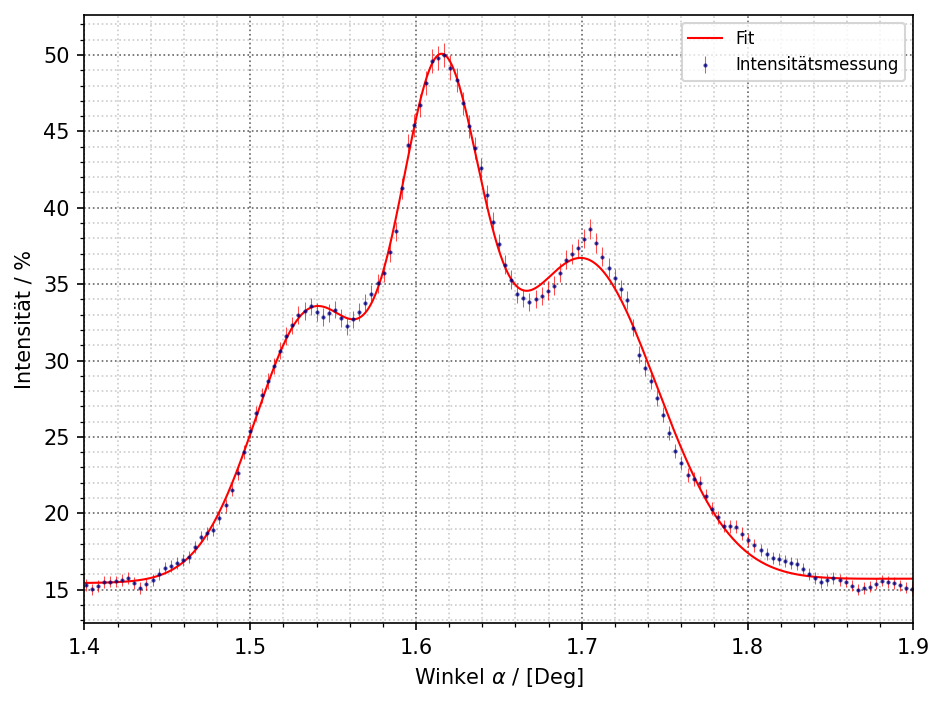

>>>>>>>>>Peak guesses: [1.52544283 1.61344915 1.72345705]
[[Model]]
    (((Model(linear, prefix='const') + Model(gaussian, prefix='gauss1')) + Model(gaussian, prefix='gauss2')) + Model(gaussian, prefix='gauss3'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 121
    # data points      = 137
    # variables        = 11
    chi-square         = 131.399070
    reduced chi-square = 1.04284976
    Akaike info crit   = 16.2813602
    Bayesian info crit = 48.4011504
    R-squared          = 0.99759817
[[Variables]]
    constslope:       0.89074396 +/- 0.34203281 (38.40%) (init = 0)
    constintercept:   14.9607191 +/- 0.58920300 (3.94%) (init = 30.5968)
    gauss1amplitude:  1.38423842 +/- 0.03282595 (2.37%) (init = 50)
    gauss1center:     1.52334577 +/- 7.0099e-04 (0.05%) (init = 1.525443)
    gauss1sigma:      0.03285378 +/- 7.0938e-04 (2.16%) (init = 0.01)
    gauss2amplitude:  2.29165853 +/- 0.03835458 (1.67%) (init = 50)
    gauss2center:     1.61496897 +

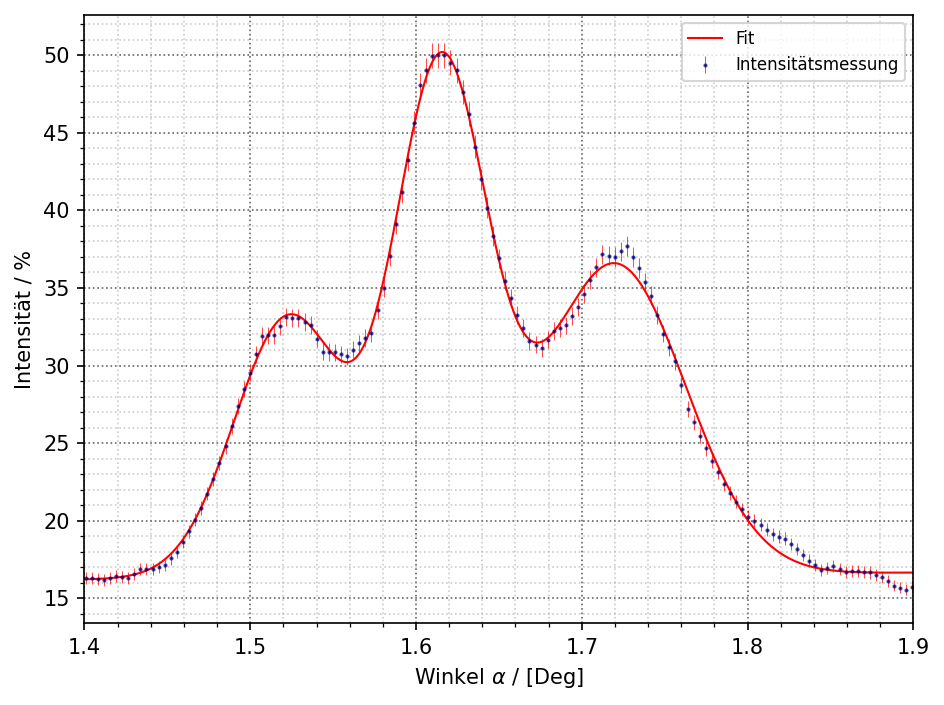

>>>>>>>>>Peak guesses: [1.5217759  1.61711608 1.72712398]
[[Model]]
    (((Model(linear, prefix='const') + Model(gaussian, prefix='gauss1')) + Model(gaussian, prefix='gauss2')) + Model(gaussian, prefix='gauss3'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 109
    # data points      = 137
    # variables        = 11
    chi-square         = 101.510596
    reduced chi-square = 0.80563965
    Akaike info crit   = -19.0750303
    Bayesian info crit = 13.0447599
    R-squared          = 0.99796498
[[Variables]]
    constslope:       0.85676132 +/- 0.31367264 (36.61%) (init = 0)
    constintercept:   14.7888617 +/- 0.54235157 (3.67%) (init = 30.18684)
    gauss1amplitude:  1.43974539 +/- 0.02953110 (2.05%) (init = 50)
    gauss1center:     1.52255791 +/- 6.0532e-04 (0.04%) (init = 1.521776)
    gauss1sigma:      0.03449745 +/- 6.4588e-04 (1.87%) (init = 0.01)
    gauss2amplitude:  2.27646639 +/- 0.03104544 (1.36%) (init = 50)
    gauss2center:     1.61692267

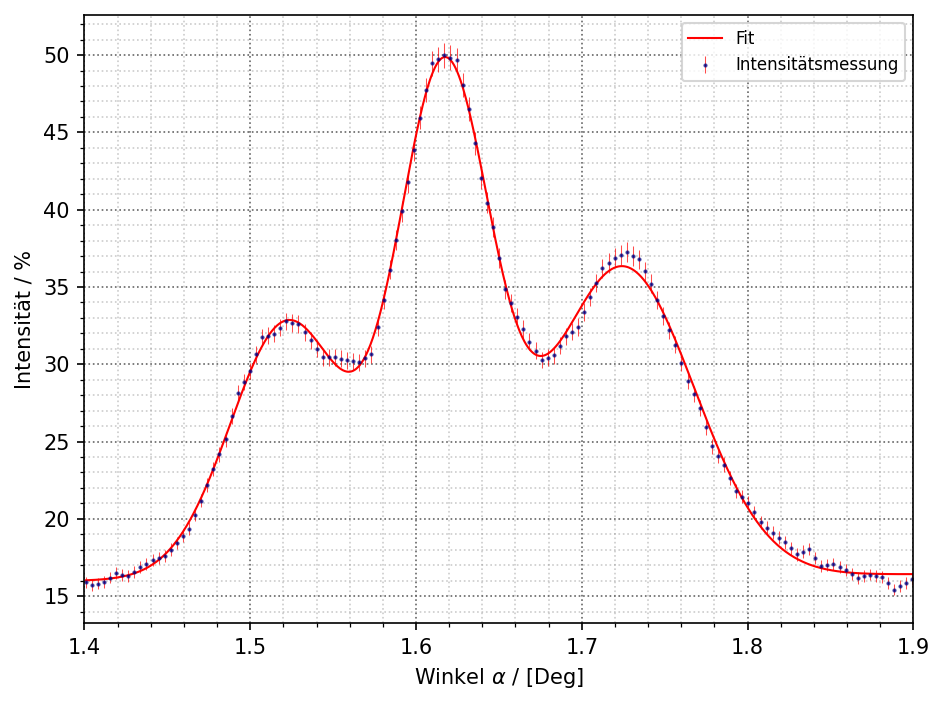

>>>>>>>>>Peak guesses: [1.51810897 1.61711608 1.72712398]
[[Model]]
    (((Model(linear, prefix='const') + Model(gaussian, prefix='gauss1')) + Model(gaussian, prefix='gauss2')) + Model(gaussian, prefix='gauss3'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 109
    # data points      = 137
    # variables        = 11
    chi-square         = 117.977634
    reduced chi-square = 0.93633043
    Akaike info crit   = 1.52043673
    Bayesian info crit = 33.6402269
    R-squared          = 0.99727731
[[Variables]]
    constslope:       0.65164859 +/- 0.34576261 (53.06%) (init = 0)
    constintercept:   15.5378432 +/- 0.59849125 (3.85%) (init = 29.56302)
    gauss1amplitude:  1.33833771 +/- 0.02913332 (2.18%) (init = 50)
    gauss1center:     1.51783964 +/- 5.9619e-04 (0.04%) (init = 1.518109)
    gauss1sigma:      0.03328163 +/- 6.6182e-04 (1.99%) (init = 0.01)
    gauss2amplitude:  2.31928937 +/- 0.02934484 (1.27%) (init = 50)
    gauss2center:     1.61582329 

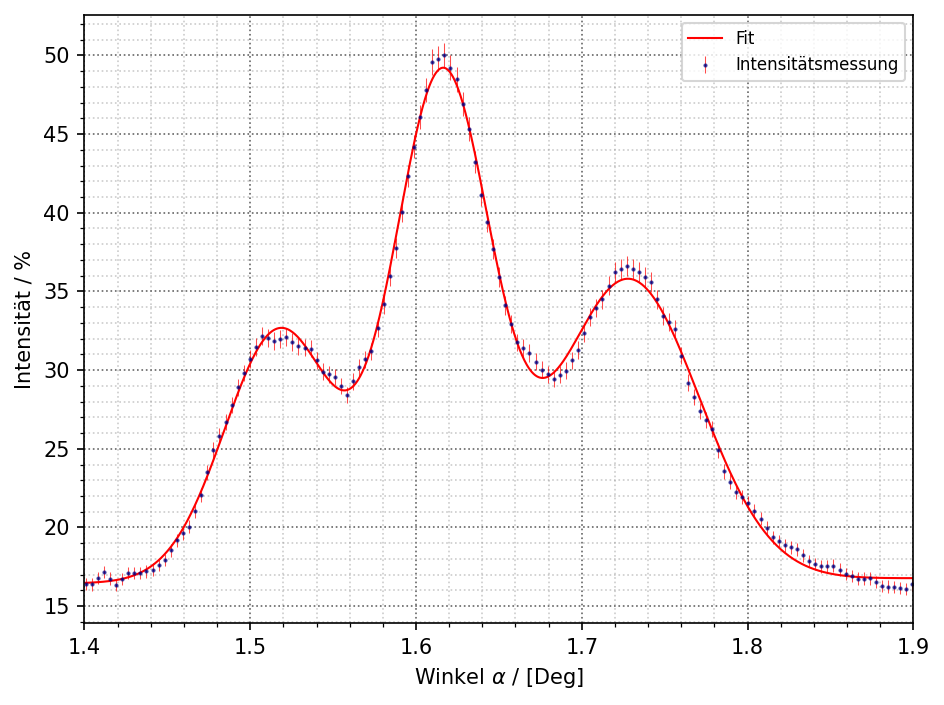

>>>>>>>>>Peak guesses: [1.50710818 1.61711608 1.73445784]
[[Model]]
    (((Model(linear, prefix='const') + Model(gaussian, prefix='gauss1')) + Model(gaussian, prefix='gauss2')) + Model(gaussian, prefix='gauss3'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 109
    # data points      = 137
    # variables        = 11
    chi-square         = 101.369664
    reduced chi-square = 0.80452115
    Akaike info crit   = -19.2653655
    Bayesian info crit = 12.8544247
    R-squared          = 0.99745557
[[Variables]]
    constslope:       1.15450349 +/- 0.34758432 (30.11%) (init = 0)
    constintercept:   14.6228169 +/- 0.60477143 (4.14%) (init = 28.99245)
    gauss1amplitude:  1.37155642 +/- 0.02751796 (2.01%) (init = 50)
    gauss1center:     1.51295031 +/- 5.1024e-04 (0.03%) (init = 1.507108)
    gauss1sigma:      0.03424310 +/- 6.1582e-04 (1.80%) (init = 0.01)
    gauss2amplitude:  2.36141273 +/- 0.02411745 (1.02%) (init = 50)
    gauss2center:     1.61574681

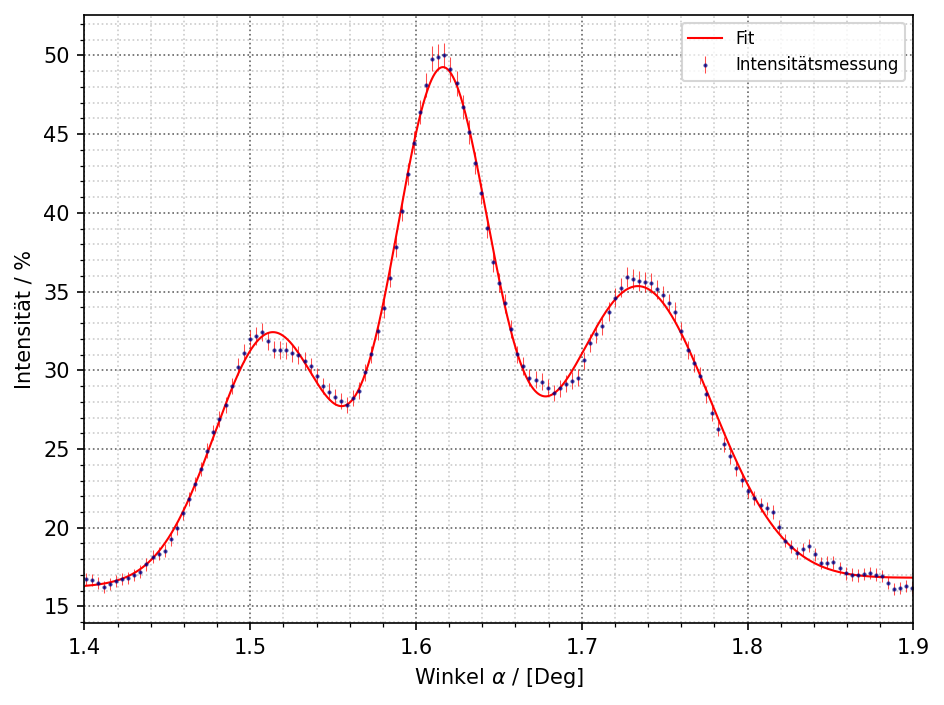

>>>>>>>>>Peak guesses: [1.51077511 1.61711608 1.73812477]
[[Model]]
    (((Model(linear, prefix='const') + Model(gaussian, prefix='gauss1')) + Model(gaussian, prefix='gauss2')) + Model(gaussian, prefix='gauss3'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 109
    # data points      = 137
    # variables        = 11
    chi-square         = 94.4779415
    reduced chi-square = 0.74982493
    Akaike info crit   = -28.9111923
    Bayesian info crit = 3.20859789
    R-squared          = 0.99736149
[[Variables]]
    constslope:       1.94674639 +/- 0.34831540 (17.89%) (init = 0)
    constintercept:   12.7602079 +/- 0.61155420 (4.79%) (init = 28.43164)
    gauss1amplitude:  1.40987135 +/- 0.02799868 (1.99%) (init = 50)
    gauss1center:     1.51075573 +/- 4.9053e-04 (0.03%) (init = 1.510775)
    gauss1sigma:      0.03517745 +/- 6.1346e-04 (1.74%) (init = 0.01)
    gauss2amplitude:  2.46564808 +/- 0.02235385 (0.91%) (init = 50)
    gauss2center:     1.61624974

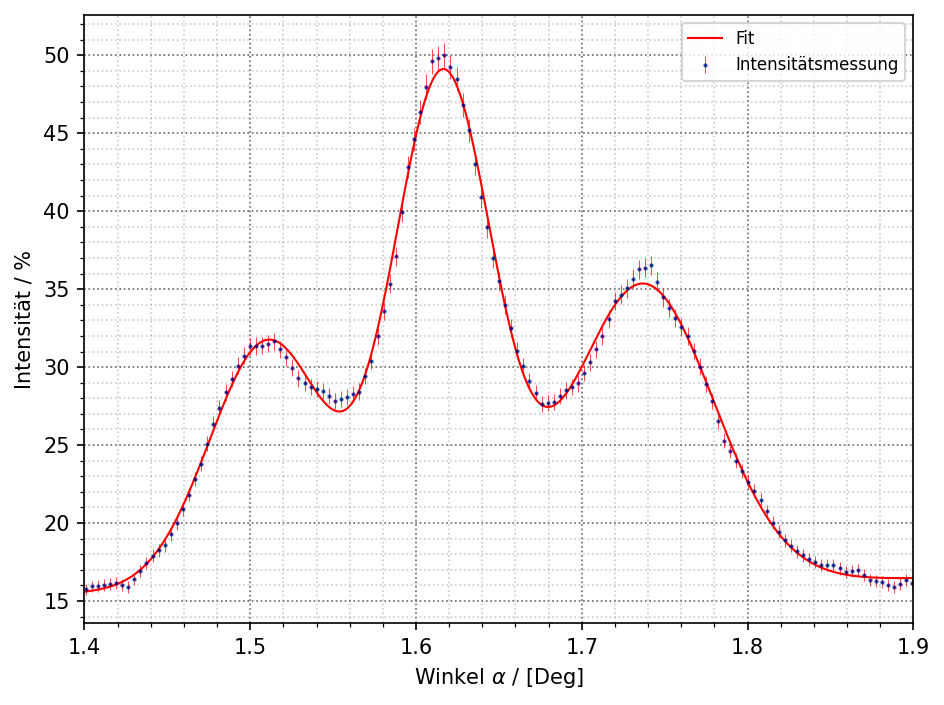

>>>>>>>>>Peak guesses: [1.50710818 1.61711608 1.7417917 ]
[[Model]]
    (((Model(linear, prefix='const') + Model(gaussian, prefix='gauss1')) + Model(gaussian, prefix='gauss2')) + Model(gaussian, prefix='gauss3'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 109
    # data points      = 137
    # variables        = 11
    chi-square         = 129.704126
    reduced chi-square = 1.02939782
    Akaike info crit   = 14.5026713
    Bayesian info crit = 46.6224615
    R-squared          = 0.99632083
[[Variables]]
    constslope:       1.39435296 +/- 0.42930297 (30.79%) (init = 0)
    constintercept:   14.5240420 +/- 0.75293183 (5.18%) (init = 28.87533)
    gauss1amplitude:  1.40304805 +/- 0.03308819 (2.36%) (init = 50)
    gauss1center:     1.50913317 +/- 5.5770e-04 (0.04%) (init = 1.507108)
    gauss1sigma:      0.03521324 +/- 7.2141e-04 (2.05%) (init = 0.01)
    gauss2amplitude:  2.38951334 +/- 0.02491454 (1.04%) (init = 50)
    gauss2center:     1.61629615 

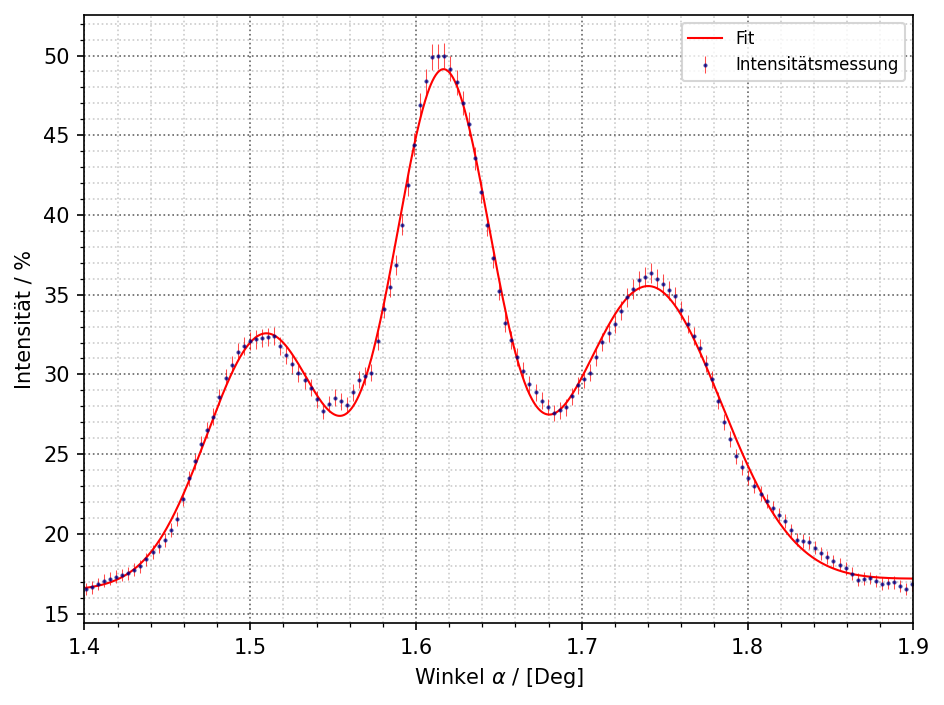

>>>>>>>>>Peak guesses: [1.50344125 1.61711608 1.74545863]
[[Model]]
    (((Model(linear, prefix='const') + Model(gaussian, prefix='gauss1')) + Model(gaussian, prefix='gauss2')) + Model(gaussian, prefix='gauss3'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 121
    # data points      = 137
    # variables        = 11
    chi-square         = 138.985828
    reduced chi-square = 1.10306213
    Akaike info crit   = 23.9715734
    Bayesian info crit = 56.0913636
    R-squared          = 0.99587007
[[Variables]]
    constslope:       1.52969684 +/- 0.46939273 (30.69%) (init = 0)
    constintercept:   13.9083887 +/- 0.82471942 (5.93%) (init = 28.00053)
    gauss1amplitude:  1.34133497 +/- 0.03453099 (2.57%) (init = 50)
    gauss1center:     1.50483182 +/- 5.6168e-04 (0.04%) (init = 1.503441)
    gauss1sigma:      0.03505676 +/- 7.5820e-04 (2.16%) (init = 0.01)
    gauss2amplitude:  2.51801531 +/- 0.02469191 (0.98%) (init = 50)
    gauss2center:     1.61674416 

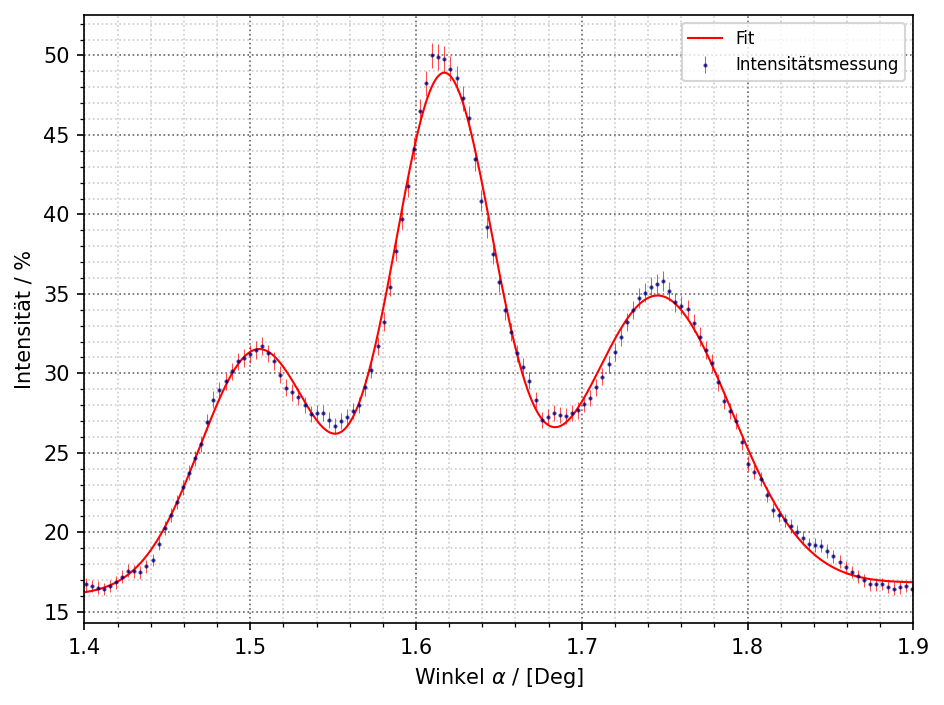

>>>>>>>>>Peak guesses: [1.49977432 1.61711608 1.74912556]
[[Model]]
    (((Model(linear, prefix='const') + Model(gaussian, prefix='gauss1')) + Model(gaussian, prefix='gauss2')) + Model(gaussian, prefix='gauss3'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 109
    # data points      = 137
    # variables        = 11
    chi-square         = 125.606248
    reduced chi-square = 0.99687498
    Akaike info crit   = 10.1044367
    Bayesian info crit = 42.2242268
    R-squared          = 0.99593017
[[Variables]]
    constslope:       2.06770256 +/- 0.49027467 (23.71%) (init = 0)
    constintercept:   13.2331562 +/- 0.86762031 (6.56%) (init = 27.91519)
    gauss1amplitude:  1.37612345 +/- 0.03667778 (2.67%) (init = 50)
    gauss1center:     1.50330441 +/- 5.4536e-04 (0.04%) (init = 1.499774)
    gauss1sigma:      0.03660591 +/- 7.8656e-04 (2.15%) (init = 0.01)
    gauss2amplitude:  2.47392841 +/- 0.02276911 (0.92%) (init = 50)
    gauss2center:     1.61748627 

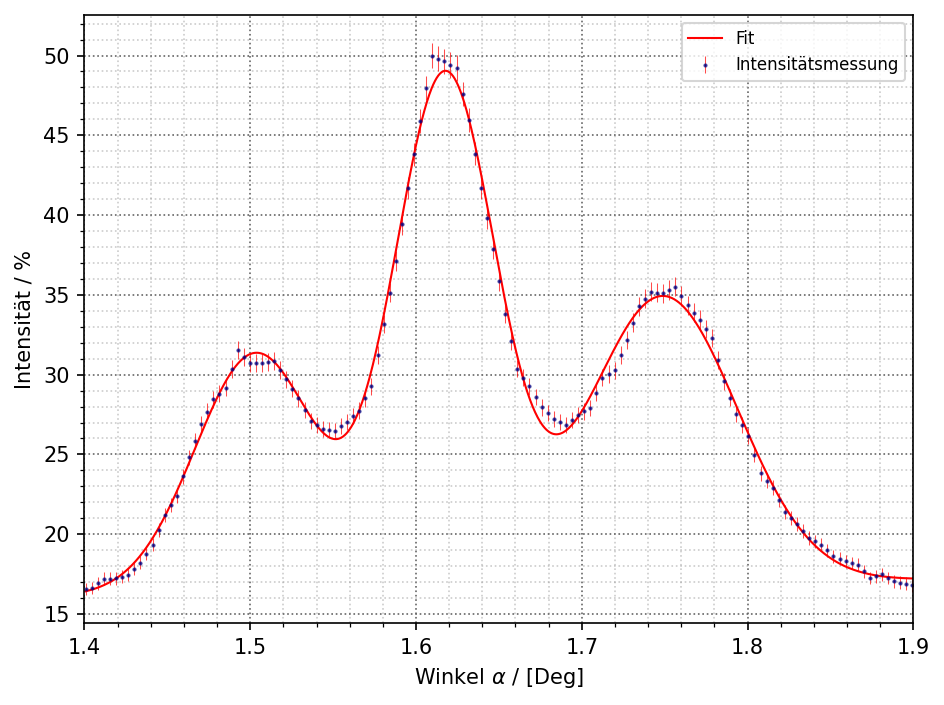

>>>>>>>>>Peak guesses: [1.49610739 1.61711608 1.75645942]
[[Model]]
    (((Model(linear, prefix='const') + Model(gaussian, prefix='gauss1')) + Model(gaussian, prefix='gauss2')) + Model(gaussian, prefix='gauss3'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 121
    # data points      = 137
    # variables        = 11
    chi-square         = 170.056116
    reduced chi-square = 1.34965172
    Akaike info crit   = 51.6122146
    Bayesian info crit = 83.7320048
    R-squared          = 0.99416823
[[Variables]]
    constslope:       1.97179924 +/- 0.61462498 (31.17%) (init = 0)
    constintercept:   13.6331457 +/- 1.09409276 (8.03%) (init = 27.88544)
    gauss1amplitude:  1.40336826 +/- 0.04562132 (3.25%) (init = 50)
    gauss1center:     1.50084077 +/- 6.2113e-04 (0.04%) (init = 1.496107)
    gauss1sigma:      0.03708409 +/- 9.3832e-04 (2.53%) (init = 0.01)
    gauss2amplitude:  2.41902404 +/- 0.02548395 (1.05%) (init = 50)
    gauss2center:     1.61698111 

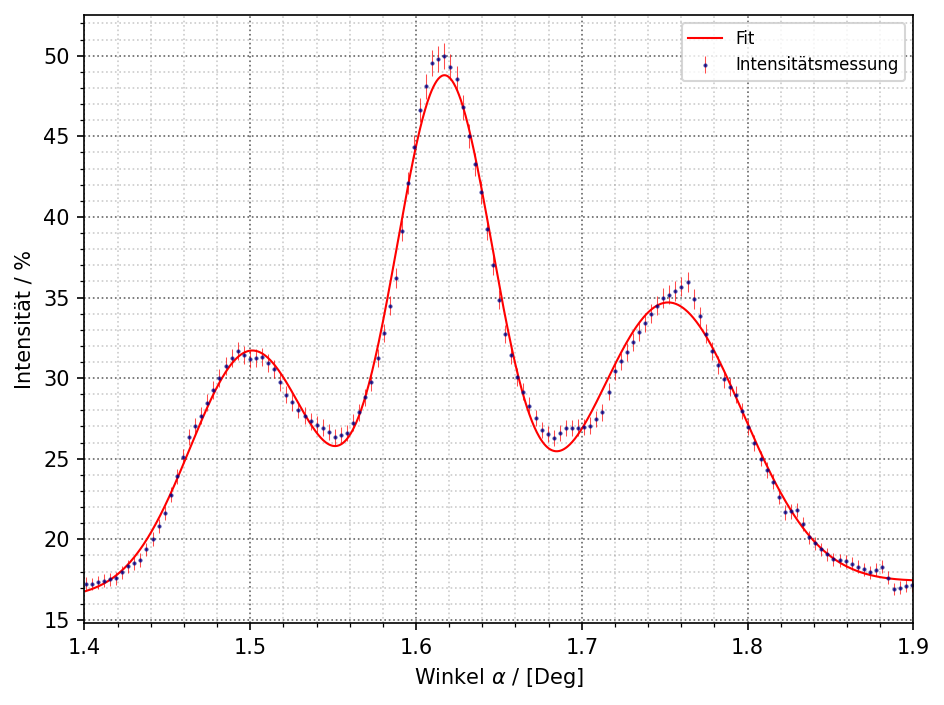

====Latex time=====================
chi_red
& 1.2621701450606932 & 1.0428497633335712 & 0.8056396504581936 & 0.9363304270763356 & 0.8045211456863272 & 0.7498249322343196 & 1.0293978214428747 & 1.1030621287107591 & 0.9968749823805522 & 1.3496517155400527 \\
& 1.2621701450606932 & 1.0428497633335712 & 0.8056396504581936 & 0.9363304270763356 & 0.8045211456863272 & 0.7498249322343196 & 1.0293978214428747 & 1.1030621287107591 & 0.9968749823805522 & 1.3496517155400527 \\
& 1.2621701450606932 & 1.0428497633335712 & 0.8056396504581936 & 0.9363304270763356 & 0.8045211456863272 & 0.7498249322343196 & 1.0293978214428747 & 1.1030621287107591 & 0.9968749823805522 & 1.3496517155400527 \\
lin_a
& 0.5708126654264108 (0.3435945830222722) & 0.8907439642693598 (0.3420328091912587) & 0.8567613163136863 (0.31367264106523696) & 0.6516485856021087 (0.34576260910567025) & 1.1545034946228974 (0.3475843215537028) & 1.9467463889789516 (0.34831539657254845) & 1.3943529607773668 (0.4293029683433928) & 1.5296968434

In [87]:
# jetzt fit
import lmfit
from scipy.ndimage import gaussian_filter1d
from scipy.signal import find_peaks

deg= 3
model = lmfit.models.LinearModel(prefix='const')
for i in range(deg):
    model = model + lmfit.models.GaussianModel(prefix='gauss'+str(i+1))
    
peaks = [1.5, 1.62, 1.72]

#params = model.make_params()
#print(params.keys())

alpha_min = 1.4
alpha_max = 1.9
'''
# Set initial values for the parameters
i = 0
for key in params.keys():
    # Default fallback values
    params[key].set(value=10)
    # Center Position for Peaks
    if key.endswith("center"):
        #params[key].set(value=peaks[i], min=0)
        params[key].set(value=peaks[i], min=alpha_min, max=alpha_max)
        i += 1
    # Widths
    if key.endswith("sigma"):
        params[key].set(value=0.01, min=0.002, max=0.1)
    # Amplitudes
    if key.endswith("amplitude"):
        params[key].set(value=30, min=0)
'''
result_dic = []

'''
print("=======Initial Peak guesses===================")
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d

# Extract and filter
CCD = dataB[i]
alpha = (np.array(CCD[:, 0]) * 9.6e-6) / 0.15 * 180 / np.pi
mask = (alpha > alpha_min) & (alpha < alpha_max)
alpha_cut = alpha[mask]
intensity_cut = CCD[:, 1][mask]

# Normalize
intensity_norm = intensity_cut / np.max(intensity_cut) * 100

# Smooth and detect peaks
intensity_smoothed = gaussian_filter1d(intensity_norm, sigma=2)
peak_indices, _ = find_peaks(intensity_smoothed, distance=10)
peak_pos = alpha_cut[peak_indices]

# Get top 3 peaks
top3 = peak_indices[np.argsort(intensity_smoothed[peak_indices])][-3:]
peak_guesses = np.sort(alpha_cut[top3])

print("Peak guesses:", peak_guesses)
print("==========================================")
'''

print(model.components)
lin_a = np.zeros((10, 1))
lin_b = np.zeros((10, 1))
dlin_a = np.zeros((10, 1))
dlin_b = np.zeros((10, 1))
peaks = np.zeros((10, 3))
dpeaks = np.zeros((10, 3))
amp = np.zeros((10, 3))
damp = np.zeros((10, 3))
sigma = np.zeros((10, 3))
dsigma = np.zeros((10, 3))
chi_red = np.zeros((10, 3))

def plotpls(i):
    plt.close()
    
    # Extract data
    CCD = dataB[i]
    
    # Convert pixel to angle (deg) 
    alpha = (np.array(CCD[:,0])*9.6e-6) / (0.15) * 180/np.pi # winkel
    
    # Select data in alpha range
    mask = (alpha > alpha_min) & (alpha < alpha_max)
    alpha_cut = alpha[mask]
    intensity_cut = CCD[:,1][mask]
    
    # Normalize intensity
    intensity_norm = intensity_cut / np.max(intensity_cut) * 50
    ######dI = intensity_norm * 0.015
    # --- Fehler --- new
    rel = 0.015
    abs_min = 0.3
    dI = np.sqrt((rel * intensity_norm)**2 + abs_min**2)
    weights = 1.0 / dI

    # Smooth and detect peaks
    intensity_smoothed = gaussian_filter1d(intensity_norm, sigma=2)
    peak_indices, _ = find_peaks(intensity_smoothed, distance=10)
    peak_pos = alpha_cut[peak_indices]

    # Get top 3 peaks
    top3 = peak_indices[np.argsort(intensity_smoothed[peak_indices])][-3:]
    peak_guesses = np.sort(alpha_cut[top3])
    print(">>>>>>>>>Peak guesses:", peak_guesses)
    # Fit data
    # --- Modell + Params pro Datensatz neu aufbauen ---
    model = lmfit.models.LinearModel(prefix='const')
    for k in range(deg):
        model += lmfit.models.GaussianModel(prefix=f'gauss{k+1}')
    
    params = model.make_params()
    
    # linearer Untergrund
    params['constintercept'].set(value=np.median(intensity_norm))
    params['constslope'].set(value=0.0)

    # Peak-Startwerte
    for k in range(deg):
        cen = peak_guesses[k]
        params[f'gauss{k+1}center'].set(value=cen, min=cen-0.03, max=cen+0.03)
        params[f'gauss{k+1}sigma'].set(value=0.01, min=0.002, max=0.1)
        params[f'gauss{k+1}amplitude'].set(value=50, min=0)

    # Fit
    result = model.fit(intensity_norm, params, x=alpha_cut, weights=weights)
    print(result.fit_report())
    ressum = result.summary()
    result = model.fit(intensity_norm, params, x=alpha_cut, weights=weights)
    print(result.fit_report())
    ressum = result.summary()
    
    #data_cut = CCD[(alpha > alpha_min) & (alpha < alpha_max)]
    #data_cut[:,1] = data_cut[:,1] / np.max(data_cut[:,1]) * 100
    #dI = data_cut[:,1]/100*1.5
    #result = model.fit(data_cut[:,1], params, x=alpha[(alpha > alpha_min) & (alpha < alpha_max)], weights=1/dI)
    #print(result.fit_report())
    #ressum_dic = result.summary()
    #fig, ax = plt.subplots(num=2, dpi=150)
    
    # Store results
    lin_a[i] = [result.params['constslope'].value]
    dlin_a[i] = [result.params['constslope'].stderr]
    lin_b[i] = [result.params['constintercept'].value]
    dlin_b[i] = [result.params['constintercept'].stderr]
    
    peaks[i] = [result.params['gauss1center'].value, result.params['gauss2center'].value, result.params['gauss3center'].value]
    dpeaks[i] = [result.params['gauss1center'].stderr, result.params['gauss2center'].stderr, result.params['gauss3center'].stderr]
    
    amp[i] = [result.params['gauss1amplitude'].value, result.params['gauss2amplitude'].value, result.params['gauss3amplitude'].value]
    damp[i] = [result.params['gauss1amplitude'].stderr, result.params['gauss2amplitude'].stderr, result.params['gauss3amplitude'].stderr]
    
    sigma[i] = [result.params['gauss1sigma'].value, result.params['gauss2sigma'].value, result.params['gauss3sigma'].value]
    dsigma[i] = [result.params['gauss1sigma'].stderr, result.params['gauss2sigma'].stderr, result.params['gauss3sigma'].stderr]
    
    chi_red[i] = [ressum["redchi"]]
    
    # Plot
    fig, ax = plt.subplots(num=2, dpi=150)
    ax.errorbar(alpha_cut, intensity_norm, yerr=dI, fmt='.', label='Intensitätsmessung',markersize=2, capsize=0, alpha=0.7, color='navy', ecolor='red', elinewidth=0.5)
    
    x_fit = np.linspace(alpha_cut.min(), alpha_cut.max(), 1000)
    ax.plot(x_fit, result.eval(x=x_fit), 'r-', label='Fit', linewidth=1)
    #x_fit = np.linspace(data_cut[:,0].min(), data_cut[:,0].max(), 100)
    
    ax.grid(visible=True, which='major', color='#666666', linestyle=':')
    ax.minorticks_on()
    ax.grid(visible=True, which='minor', color='#999999', linestyle=':', alpha=0.5)
    
    #ax.set_title(fr'Intensitäten für I= {dataB_namen[i]}')
    ax.set_xlabel(r'Winkel $\alpha$ / [Deg]')
    ax.set_ylabel(r'Intensität / %')
    ax.set_xlim([alpha_min, alpha_max])
    ax.legend(prop={'size': 8}, loc = 'best')
    
    #plt.errorbar(data_cut[:,0], data_cut[:,1], yerr=dI, fmt='o', label='Intensitätsmessung',markersize=2, capsize=0, alpha=0.7, color='navy', ecolor='red', elinewidth=0.5)
    #plt.plot(x_fit, result.eval(x=x_fit), 'r-', label='Fit', linewidth=1)
    #plt.grid(visible=True, which='major', color='#666666', linestyle=':')
    #plt.minorticks_on()
    #plt.grid(visible=True, which='minor', color='#999999', linestyle=':', alpha=0.5)
    #plt.legend(prop={'size': 8}, loc = 'best')
    #plt.title(fr'Intensitäten für I= {dataB_namen[i]}')
    #plt.xlabel(r'Winkel $\alpha$ / [Deg]')
    #plt.ylabel(r'Intensität / %')
    #plt.xlim([alpha_min, alpha_max])
    plt.tight_layout()
    plt.savefig(f'../plots/zeeman_plt/peak_{dataB_benennung[i]}.pdf', dpi=150)
    plt.show()
    plt.close()
    
    result_dic.append(result)
    
for i in range(0,10):
    plotpls(i)

print('====Latex time=====================')
# Print results in LaTeX format
def latex_stuff(data, data_err):
    if len(data_err) == 0:
        for j in range(len(data[0])):
            for i in range(len(data)):
                print(r'&', f'{data[i][j]}', end=' ')
            print(r'\\')
    else:
        for j in range(len(data[0])):
            for i in range(len(data)):
                print(r'&',f'{data[i][j]} ({data_err[i][j]})', end=' ')
            print(r'\\')
print('chi_red')
latex_stuff(chi_red, []) 
print('lin_a')   
latex_stuff(lin_a, dlin_a)
print('lin_b')
latex_stuff(lin_b, dlin_b)
print('peaks')
latex_stuff(peaks, dpeaks)
print('amps')
latex_stuff(amp, damp)
print('sigma')
latex_stuff(sigma, dsigma)  

def weird_err(data, data_err):
    if len(data_err) == 0:
        for j in range(len(data[0])):
            for i in range(len(data)):
                print(r'&', f'{data[i][j]}', end=' ')
            print(r'\\')
    else:
        for j in range(len(data[0])):
            for i in range(len(data)):
                print(r'&'+'{' + '\\' + 'num[round-mode=figures,round-precision=2]' + '{' + f'{data[i][j]}' + '}', '$\\pm$', '\\' + 'num[round-mode=figures,round-precision=2]{' + f'{data_err[i][j]}' + '}' + '}', end=' ')
            print(r'\\')
print('weird err a')
weird_err(lin_a, dlin_a)
print('weird err b') 
weird_err(lin_b, dlin_b)

print('============Dataframe mit Latex====================')
namen_arr = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
df = pd.DataFrame({
    'Peak': namen_arr,
    'chi_red': chi_red[:,0],
    'lin_a': lin_a[:,0],
    'dlin_a': dlin_a[:,0],
    'lin_b': lin_b[:,0],
    'dlin_b': dlin_b[:,0],
    'amp1': amp[:,0],
    'damp1': damp[:,0],
    'peak1': peaks[:,0],
    'dpeak1': dpeaks[:,0],
    'sigma1': sigma[:,0],
    'dsigma1': dsigma[:,0],
    'amp2': amp[:,1],
    'damp2': damp[:,1],
    'peak2': peaks[:,1],
    'dpeak2': dpeaks[:,1],
    'sigma2': sigma[:,1],
    'dsigma2': dsigma[:,1],
    'amp3': amp[:,2],
    'damp3': damp[:,2],
    'peak3': peaks[:,2],
    'dpeak3': dpeaks[:,2],
    'sigma3': sigma[:,2],
    'dsigma3': dsigma[:,2],    
})
print(df)
df_latex = df.to_latex('../data/zeeman_used/zeeman_latex.tex', index=False, escape=False, float_format="%.2f", column_format='l' + 'c' * (len(df.columns)-1), multirow=True)
print('Dataframe mit Latex gespeichert')
print(df_latex)
print('====================================')

In [88]:
# constants
h = 6.62607015e-34  # Planck constant [J·s]
c = 299792458       # Speed of light [m/s]
lambda_0 = 643.85e-9  # Wavelength [m]
n = 1.457          # Refractive index of Fabry-Pérot etalon

# Precompute hc/lambda
hc_lambda = h * c / lambda_0

# convert angles from degree to radians
peaks_rad = np.deg2rad(peaks) # shape (10,3)
dpeaks_rad = np.deg2rad(dpeaks)

# extract pi, sigma-, sigma+
pi = peaks_rad[:, 0]
sigma_m = peaks_rad[:, 1]
sigma_p = peaks_rad[:, 2]

dpi   = dpeaks_rad[:, 0]
dsigma_m = dpeaks_rad[:, 1]
dsigma_p = dpeaks_rad[:, 2]

# Sine squares
sin2_pi   = np.sin(pi)**2
sin2_sigma_m = np.sin(sigma_m)**2
sin2_sigma_p = np.sin(sigma_p)**2

# Safe denominators
eps = 1e-6
denom_p = np.clip(sin2_pi - n**2, eps, None)
denom_m = np.clip(sin2_sigma_p - n**2, eps, None)

# Energy shifts
E_plus  = -hc_lambda * (1 - np.sqrt((sin2_sigma_m - n**2) / denom_p))
E_minus = -hc_lambda * (1 - np.sqrt((sin2_sigma_m - n**2) / denom_m))

# Error propagation
dE_plus = 0.1 * hc_lambda / np.sqrt((sin2_sigma_m - n**2) / denom_p) * np.sqrt(
    (np.sin(sigma_m) * np.cos(sigma_m) * dsigma_m / denom_p)**2 +
    (np.sin(pi) * np.cos(pi) * dpi * (sin2_sigma_m - n**2) / denom_p**2)**2
)

dE_minus = 0.1 * hc_lambda / 2 / np.sqrt((sin2_sigma_m - n**2) / denom_m) * np.sqrt(
    (np.sin(sigma_m) * np.cos(sigma_m) * 2 * dsigma_m / denom_m)**2 +
    (np.sin(sigma_p) * np.cos(sigma_p) * 2 * dsigma_p * (sin2_sigma_m - n**2) / denom_m**2)**2
)

# Output
print(f'{E_minus = }')
print(f'{dE_minus = }')
print('================================================================')
print(f'{E_plus = }')
print(f'{dE_plus = }')

E_minus = array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])
dE_minus = array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])
E_plus = array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])
dE_plus = array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])


/tmp/ipykernel_77260/2244293940.py:34: RuntimeWarning: invalid value encountered in sqrt
  E_plus  = -hc_lambda * (1 - np.sqrt((sin2_sigma_m - n**2) / denom_p))
/tmp/ipykernel_77260/2244293940.py:35: RuntimeWarning: invalid value encountered in sqrt
  E_minus = -hc_lambda * (1 - np.sqrt((sin2_sigma_m - n**2) / denom_m))
/tmp/ipykernel_77260/2244293940.py:38: RuntimeWarning: invalid value encountered in sqrt
  dE_plus = 0.1 * hc_lambda / np.sqrt((sin2_sigma_m - n**2) / denom_p) * np.sqrt(
/tmp/ipykernel_77260/2244293940.py:43: RuntimeWarning: invalid value encountered in sqrt
  dE_minus = 0.1 * hc_lambda / 2 / np.sqrt((sin2_sigma_m - n**2) / denom_m) * np.sqrt(


In [89]:
# Energieverschiebung
#hc_lambda = 6.626E-34*3E8/(643.85E-9) # hc/lambda
#n = 1.457 # Brechungsindex

print(np.sin(peaks[:,0]*np.pi/180)**2 - n**2)
print(np.sin(peaks[:,0]*np.pi/180)**2)
E_plus = -hc_lambda*(1-np.sqrt((np.power(np.sin(peaks[:,1]*np.pi/180), 2)-n*n)/(np.power(np.sin(peaks[:,0]*np.pi/180), 2)-n*n)))
E_minus = -hc_lambda*(1-np.sqrt((np.power(np.sin(peaks[:,1]*np.pi/180), 2)-n*n)/(np.power(np.sin(peaks[:,2]*np.pi/180), 2)-n*n)))
dE_plus = .1*hc_lambda*1/np.sqrt((np.power(np.sin(peaks[:,1]*np.pi/180), 2)-n*n)/(np.power(np.sin(peaks[:,0]*np.pi/180), 2)-n*n))\
            *np.sqrt(np.power(np.sin(peaks[:,1]*np.pi/180)*np.cos(peaks[:,1]*np.pi/180)*dpeaks[:,1]/(np.power(np.sin(peaks[:,0]*np.pi/180), 2)-n*n),2)\
            + np.power(np.sin(peaks[:,0]*np.pi/180)*np.cos(peaks[:,0]*np.pi/180)*dpeaks[:,0]/np.power(np.power(np.sin(peaks[:,0]*np.pi/180), 2)-n*n, 2)*(np.power(np.sin(peaks[:,1]*np.pi/180), 2)-n*n), 2))
dE_minus = .1*hc_lambda*1/2*1/np.sqrt((np.power(np.sin(peaks[:,1]*np.pi/180), 2)-n*n)/(np.power(np.sin(peaks[:,2]*np.pi/180), 2)-n*n))\
            *np.sqrt(np.power(np.sin(peaks[:,1]*np.pi/180)*np.cos(peaks[:,1]*np.pi/180)*2*dpeaks[:,1]/(np.power(np.sin(peaks[:,2]*np.pi/180), 2)-n*n),2)\
            + np.power(np.sin(peaks[:,2]*np.pi/180)*np.cos(peaks[:,2]*np.pi/180)*2*dpeaks[:,2]/np.power(np.power(np.sin(peaks[:,2]*np.pi/180), 2)-n*n, 2)*(np.power(np.sin(peaks[:,1]*np.pi/180), 2)-n*n), 2))

print(f'{E_plus= }')
print(f'{dE_plus = }')
print('================================================================')
print(f'{E_minus= }')
print(f'{dE_minus = }')

[-2.12212875 -2.12214228 -2.12214301 -2.12214738 -2.12215189 -2.12215391
 -2.1221554  -2.12215935 -2.12216075 -2.122163  ]
[0.00072025 0.00070672 0.00070599 0.00070162 0.00069711 0.00069509
 0.0006936  0.00068965 0.00068825 0.000686  ]
E_plus= array([-5.32915384e-24, -6.36401678e-24, -6.55687388e-24, -6.79571504e-24,
       -7.11821408e-24, -7.30105499e-24, -7.41282276e-24, -7.73180640e-24,
       -7.88661695e-24, -8.01425994e-24])
dE_plus = array([4.98887570e-25, 3.12260981e-25, 2.67998395e-25, 2.65912527e-25,
       2.27497756e-25, 2.16993096e-25, 2.47914342e-25, 2.48325746e-25,
       2.38615519e-25, 2.70939876e-25])
E_minus= array([6.30851426e-24, 7.72640168e-24, 7.94661399e-24, 8.30332853e-24,
       8.75379310e-24, 8.93855307e-24, 9.18389074e-24, 9.59152370e-24,
       9.77454032e-24, 1.00623306e-23])
dE_minus = array([5.11217846e-25, 3.29170772e-25, 2.70398899e-25, 2.77399203e-25,
       2.42910156e-25, 2.16914069e-25, 2.57809002e-25, 2.61128664e-25,
       2.46851531e-25, 2.823

Lampenposition d_lamp = -0.0001998263006090471 ± 0.002 mm
B am Lampenort: 488.9123921194152 mT
B bei d + delta_d: 477.0650035836432 mT
B bei d - delta_d: 476.2547857984967 mT
Beitrag zur B-Unsicherheit durch Ortsunsicherheit: 12.65760632091849 mT
1 & 4.58 (0.069) & 451.2 (15.55) \
2 & 5.42 (0.081) & 511.0 (16.27) \
3 & 5.70 (0.085) & 528.6 (16.50) \
4 & 6.00 (0.090) & 546.0 (16.72) \
5 & 6.55 (0.098) & 573.8 (17.09) \
6 & 6.79 (0.102) & 584.2 (17.23) \
7 & 7.08 (0.106) & 595.2 (17.38) \
8 & 7.62 (0.114) & 611.1 (17.60) \
9 & 8.01 (0.120) & 618.6 (17.70) \
10 & 8.72 (0.131) & 623.1 (17.77) \
B_arr = [0.45115324 0.51101929 0.52860798 0.54601985 0.57383443 0.58420558
 0.59522506 0.61110104 0.61859476 0.62306151]
B_err_arr = [0.01554738 0.01627186 0.01649519 0.01672062 0.0170893  0.01722935
 0.01737962 0.01759872 0.01770318 0.01776575]
E1_arr = [5.32915384e-24 6.36401678e-24 6.55687388e-24 6.79571504e-24
 7.11821408e-24 7.30105499e-24 7.41282276e-24 7.73180640e-24
 7.88661695e-24 8.0142599

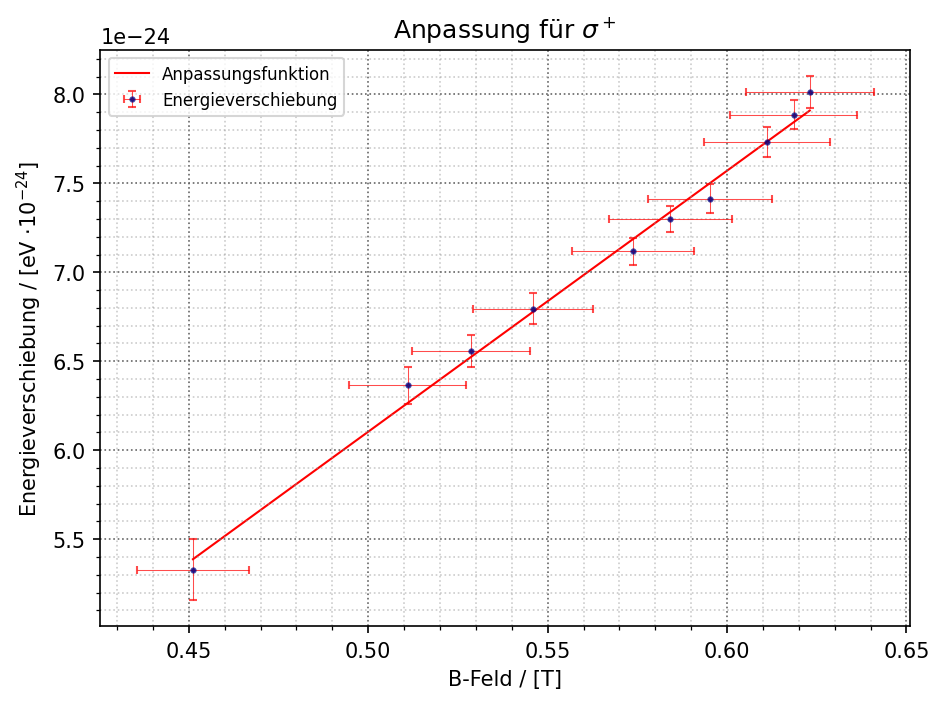

popt = array([ 3.49487972e-23, -4.02807580e-24])
pcov = array([[ 5.46119277e-49, -3.15212132e-49],
       [-3.15212132e-49,  1.82810819e-49]])


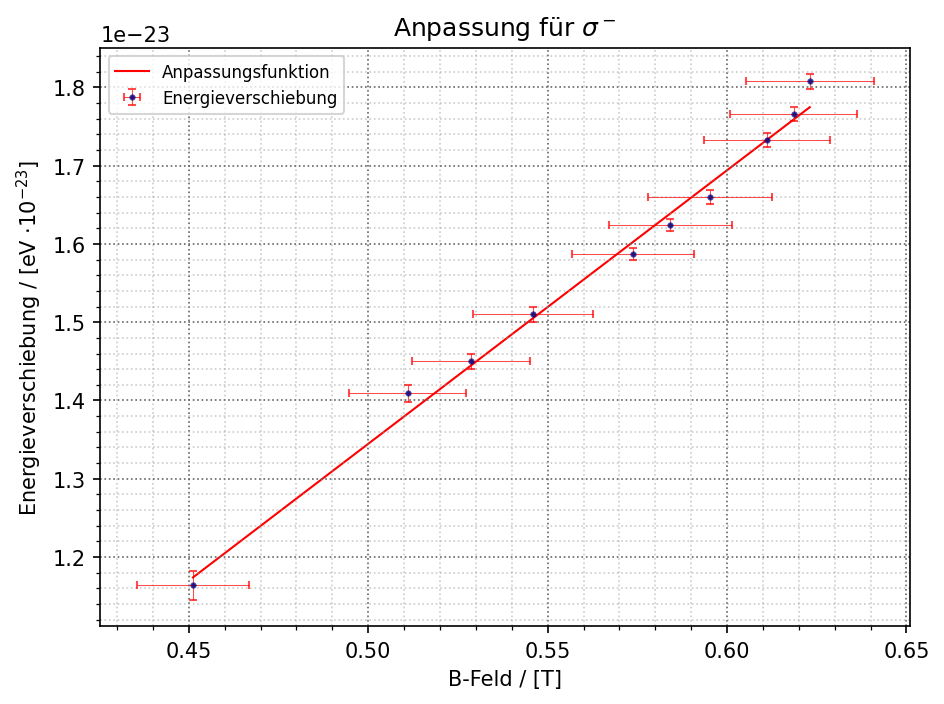

====DataFrame und Latex====
    I_A     dI_A        B_mT      dB_mT     E_plus_eV    dE_plus_eV  \
0  4.58  0.06870  451.153236  15.547378  5.329154e-24  1.698710e-25   
1  5.42  0.08130  511.019290  16.271863  6.364017e-24  1.039135e-25   
2  5.70  0.08550  528.607982  16.495190  6.556874e-24  8.954802e-26   
3  6.00  0.09000  546.019854  16.720625  6.795715e-24  8.817719e-26   
4  6.55  0.09825  573.834426  17.089300  7.118214e-24  7.528254e-26   
5  6.79  0.10185  584.205584  17.229345  7.301055e-24  7.214082e-26   
6  7.08  0.10620  595.225061  17.379621  7.412823e-24  8.206638e-26   
7  7.62  0.11430  611.101043  17.598723  7.731806e-24  8.235718e-26   
8  8.01  0.12015  618.594759  17.703179  7.886617e-24  7.967758e-26   
9  8.72  0.13080  623.061510  17.765751  8.014260e-24  9.056377e-26   

     E_minus_eV   dE_minus_eV  
0  1.163743e-23  1.838395e-25  
1  1.409007e-23  1.123646e-25  
2  1.450311e-23  9.590804e-26  
3  1.509864e-23  9.497167e-26  
4  1.587156e-23  8.152608e-26 

In [95]:
import scipy.constants as const

# ---------- Modelle

def linear_model(x,m,b):
    return m*x + b

def func(I,a,b,c,d):
    # Magnetfeld als Funktion des Stroms I in A
    return a*I**3 + b*I**2 + c*I + d

degtorad = np.pi/180

# ---------- Ergebnisse Strom-Kalibrierung B(I)
popt_new = np.array([-4.85763571e-01,  7.97441817e-02,  1.06989627e+02,  6.13623306e+00])
pcov_new = np.array([[ 9.07627021e-34,  2.31445275e-34, -4.14118675e-32,
        -3.52113313e-33],
       [ 2.31445275e-34,  1.78149162e-32, -7.54154088e-33,
        -4.51063467e-31],
       [-4.14118675e-32, -7.54154088e-33,  2.25022368e-30,
         1.14748549e-31],
       [-3.52113313e-33, -4.51063467e-31,  1.14748549e-31,
         2.05648647e-29]])

# ---------- Ergebnisse Ortskalibrierung B(d)
A_pos     = 6.401754962340863
d0_pos    = -0.0001998263006090471
sigma_pos = 0.007425411716828867
a_bg_pos  = 145.00820581271117
b_bg_pos  = 202.55444628663946

# d in mm, B in mT
#A_pos     = 6401.7554
#d0_pos    = -0.199826     # mm
#sigma_pos = 7.425412      # mm
#a_bg_pos  = 145.0082
#b_bg_pos  = 0.2025545     # mT/mm

def B_of_d(d):
    gauss_height = A_pos / (np.sqrt(2 * np.pi) * sigma_pos)
    return gauss_height * np.exp(-((d - d0_pos)**2) / (2 * sigma_pos**2)) \
           + a_bg_pos + b_bg_pos * d


#def B_of_d(d):
#    # Magnetfeld als Funktion des Abstands d in mm
#    return A_pos * np.exp(-((d - d0_pos)**2) / (2 * sigma_pos**2)) + a_bg_pos + b_bg_pos * d

# Lampenposition
d_lamp = d0_pos
d_lamp_err = 2e-3 # in mm
print(f'Lampenposition d_lamp = {d_lamp} ± {d_lamp_err} mm')

# Beitrag zur B-Unsicherheit
B_center = B_of_d(d_lamp)
B_plus = B_of_d(d_lamp + d_lamp_err)
B_minus = B_of_d(d_lamp - d_lamp_err)
print(f'B am Lampenort: {B_center} mT')
print(f'B bei d + delta_d: {B_plus} mT')
print(f'B bei d - delta_d: {B_minus} mT')

DeltaB_pos = max(abs(B_plus - B_center), abs(B_minus - B_center))
print(f'Beitrag zur B-Unsicherheit durch Ortsunsicherheit: {DeltaB_pos} mT')

I = np.array([4.58, 5.42, 5.70, 6.00, 6.55, 6.79, 7.08, 7.62, 8.01, 8.72])  # in A
dI = 0.015*I  # in A
n = 1.457
lambda_0 = 643.85e-9  # in m
dlambda = 0.2e-9  # in m

def dB_from_I(I_arr, idx):
    return 0.02*func(I_arr[idx], *popt_new) +0.005

def E(n, api, asigma, lamb):
    return (const.h*const.c/lamb) * (
        1 - np.sqrt((np.sin(api*degtorad)**2 - n**2) /
                    (np.sin(asigma*degtorad)**2 - n**2))
    )

def dE(n, api, asigma, lamb, dapi, dasigma, dlamb):
    a = const.h * const.c / lamb
    b = E(n, api, asigma, lamb) * dlamb / lamb
    c = (np.sin(api*degtorad) * np.cos(api*degtorad) * dapi*degtorad /
         ((n**2 - np.sin(asigma*degtorad)**2) *
          np.sqrt((n**2 - np.sin(api*degtorad)**2) /
                  (n**2 - np.sin(asigma*degtorad)**2))))
    d = (((n**2 - np.sin(api*degtorad)**2) *
          np.sin(asigma*degtorad) * np.cos(asigma*degtorad) * dasigma*degtorad) /
         ((n**2 - np.sin(asigma*degtorad)**2) *
          np.sqrt((n**2 - np.sin(api*degtorad)**2) /
                  (n**2 - np.sin(asigma*degtorad)**2))))
    return a*np.sqrt(b**2 + c**2 + d**2)

B      = []
B_err  = []
E1     = []; E1_err = []   # sigma+
E2     = []; E2_err = []   # sigma-

for i in range(len(I)):
    # B-Zentralwert aus Strom-Kalibrierung (mT)
    B_i = func(I[i], *popt_new)
    B.append(B_i)
    
    # B-Fehler aus Strom + Ortsabhängigkeit (quadratisch addiert)
    dB_I_mT = dB_from_I(I, i)
    dB_tot_mT = np.sqrt(dB_I_mT**2 + DeltaB_pos**2)
    B_err.append(dB_tot_mT)
    
    # Energiesplittings aus deinen Peaks (peaks, dpeaks müssen vorher definiert sein)
    E1_i = E(n, peaks[i][1], peaks[i][0], lambda_0)
    E1.append(E1_i)
    E1_err.append(dE(n, peaks[i][1], peaks[i][0], lambda_0,
                     dpeaks[i][1], dpeaks[i][0], dlambda))
    
    E2_i = E(n, peaks[i][2], peaks[i][0], lambda_0)
    E2.append(E2_i)
    E2_err.append(dE(n, peaks[i][2], peaks[i][0], lambda_0,
                     dpeaks[i][2], dpeaks[i][0], dlambda))
    
    print(fr'{i+1} & {I[i]:.2f} ({dI[i]:.3f}) & '
          f'{B_i:5.1f} ({dB_tot_mT:5.2f}) \\')

# in T umrechnen
B_arr     = np.array(B)/1000.0
print(f'B_arr = {B_arr}')
B_err_arr = np.array(B_err)/1000.0
print(f'B_err_arr = {B_err_arr}')
E1_arr    = np.array(E1)
print(f'E1_arr = {E1_arr}')
E1_err_arr= np.array(E1_err)
print(f'E1_err_arr = {E1_err_arr}')
E2_arr    = np.array(E2)
print(f'E2_arr = {E2_arr}')
E2_err_arr= np.array(E2_err)
print(f'E2_err_arr = {E2_err_arr}')

# ggf. wie bisher auf hohen B-Bereich beschränken
#B_fit      = B_arr[5:]
#B_err_fit  = B_err_arr[5:]
#E1_fit     = E1_arr[5:]
#E1_err_fit = E1_err_arr[5:]
#E2_fit     = E2_arr[5:]
#E2_err_fit = E2_err_arr[5:]

def plot(arr, arr_err, B_sub, B_err_sub, fig_nr, is_sigma_plus):
    popt, pcov = curve_fit(linear_model, B_sub, arr, sigma=arr_err, absolute_sigma=True)
    print(f'{popt = }')
    print(f'{pcov = }')
    
    fig, ax = plt.subplots(num=fig_nr, dpi=150)
    ax.plot(B_sub, linear_model(B_sub, *popt), 'r-', label='Anpassungsfunktion', linewidth=1, zorder=1)
    ax.errorbar(B_sub, arr, yerr=arr_err, xerr=B_err_sub,
                fmt='o', label='Energieverschiebung',
                markersize=2, capsize=2, alpha=0.7,
                color='navy', ecolor='red', elinewidth=0.5, zorder=2)
    ax.grid(visible=True, which='major', color='#666666', linestyle=':')
    ax.minorticks_on()
    ax.grid(visible=True, which='minor', color='#999999', linestyle=':', alpha=0.5)
    ax.legend(prop={'size': 8}, loc='best')
    ax.set_xlabel(r'B-Feld / [T]')
    if is_sigma_plus:
        ax.set_title(r'Anpassung für $\sigma^+$')
        ax.set_ylabel(r'Energieverschiebung / [eV $\cdot 10^{-24}$]')
    else:
        ax.set_title(r'Anpassung für $\sigma^-$')
        ax.set_ylabel(r'Energieverschiebung / [eV $\cdot 10^{-23}$]')
    plt.tight_layout()
    plt.show()
    
    return {"popt": popt, "pcov": pcov}

sigma_plus  = plot(E1_arr, E1_err_arr, B_arr, B_err_arr, 3, True)
sigma_minus = plot(E2_arr, E2_err_arr, B_arr, B_err_arr, 4, False)
print('====DataFrame und Latex====')
df_final = pd.DataFrame({
    'I_A': I,
    'dI_A': dI,
    'B_mT': np.array(B),
    'dB_mT': np.array(B_err),
    'E_plus_eV': E1_arr,
    'dE_plus_eV': E1_err_arr,
    'E_minus_eV': E2_arr,
    'dE_minus_eV': E2_err_arr,
})
print(df_final)


## Bohrsche Magneton

In [101]:
mu_plus = sigma_plus["popt"][0]
dmu_plus = np.sqrt(sigma_plus["pcov"][0,0])
mu_minus = sigma_minus["popt"][0]
dmu_minus = np.sqrt(sigma_minus["pcov"][0,0])

print('sigma plus: ')
print(f'mu_plus = {mu_plus} ± {dmu_plus}')
print('sigma minus: ')
print(f'm_minus = {mu_minus} ± {dmu_minus}')

mu_vals = np.array([mu_plus, mu_minus])
dmu_vals = np.array([dmu_plus, dmu_minus])

weights = 1 / dmu_vals**2
mu_weighted = np.sum(mu_vals * weights) / np.sum(weights)
dmu_weighted = np.sqrt(1 / np.sum(weights))

print('====Weighted mean of mu====')
print(f'mu_weighted = {mu_weighted} ± {dmu_weighted}')

sigma plus: 
mu_plus = 1.4666892892950868e-23 ± 6.850017629437993e-25
sigma minus: 
m_minus = 3.494879715649313e-23 ± 7.389988340453054e-25
====Weighted mean of mu====
mu_weighted = 2.4039874150525676e-23 ± 5.023752823585163e-25
